TWO LAYERS

In [4]:
import os
import tarfile
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
from NeuralNMF import train
from sklearn.feature_extraction.text import TfidfVectorizer
from NeuralNMF import Neural_NMF
import pickle
import scipy.io
import random
import numpy as np
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)



mat_data = scipy.io.loadmat(r"C:\Users\ASUS\Downloads\For_Tezuka\For_Tezuka\Opto_Data_CLa13.mat")

In [5]:
train__ = mat_data["S"][0][0]

train__ = torch.tensor(train__)

In [6]:
opto = mat_data["opt"][0][0]

In [7]:
m, k1, k2 = 101, 50, 5
net = Neural_NMF([m, k1, k2])

In [8]:
history = train(net, train__, epoch=20, lr=500, supervised=False)

100%|██████████| 20/20 [00:26<00:00,  1.35s/it]


In [9]:
history[1][1].shape

torch.Size([5, 5957])

In [10]:
A = history[0][1]
S = history[1][1]

In [12]:
A1 = A.detach().numpy()
S1 = S.detach().numpy()

In [27]:
indices = np.where(opto == 1)[1]

In [28]:
indices

array([3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3416, 3417,
       3418, 3419, 3420, 3421, 3422, 3423, 3424, 3713, 3714, 3715, 3716,
       3717, 3718, 3719, 3720, 3721, 3722, 4011, 4012, 4013, 4014, 4015,
       4016, 4017, 4018, 4019, 4020, 4309, 4310, 4311, 4312, 4313, 4314,
       4315, 4316, 4317, 4318, 4607, 4608, 4609, 4610, 4611, 4612, 4613,
       4614, 4615, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913,
       5203, 5204, 5205, 5206, 5207, 5208, 5209, 5210, 5211, 5500, 5501,
       5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5798, 5799, 5800,
       5801, 5802, 5803, 5804, 5805, 5806, 5807], dtype=int64)

In [30]:
slices = []
for idx in indices:
    # Ensure we do not go out of bounds
    if idx + 20 <= S1.shape[1]:
        slices.append(S1[:, idx:idx+20])
    else:
        slices.append(S1[:, idx:])

In [31]:
C = np.hstack(slices) if slices else np.array([])

In [32]:
C.shape

(5, 1900)

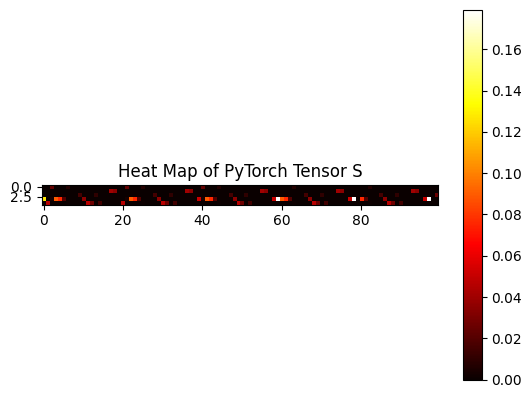

In [49]:
plt.imshow(C[:,-100:], cmap='hot', interpolation='nearest')
plt.colorbar()  # Show color scale
plt.title('Heat Map of PyTorch Tensor S')
plt.show()

In [38]:
flattened_data = [matrix.flatten() for matrix in slices]

In [43]:
Xt = np.array(flattened_data)

In [44]:
Xt.shape

(95, 100)

In [45]:
kmeans = KMeans(n_clusters=5, random_state=0)
pattern_labels = kmeans.fit_predict(Xt)

In [47]:
pattern_labels


array([3, 4, 1, 4, 0, 2, 0, 2, 2, 3, 3, 4, 1, 2, 0, 2, 2, 2, 4, 3, 4, 1,
       4, 0, 2, 0, 2, 2, 4, 3, 4, 1, 4, 0, 2, 0, 2, 2, 4, 1, 4, 0, 2, 0,
       2, 2, 2, 2, 3, 4, 1, 1, 0, 1, 0, 2, 2, 3, 4, 1, 1, 0, 2, 0, 2, 2,
       3, 3, 4, 1, 0, 0, 2, 0, 2, 3, 4, 3, 4, 1, 2, 0, 2, 0, 2, 4, 3, 3,
       0, 1, 0, 2, 2, 2, 2])